<a href="https://colab.research.google.com/github/newgirlcarol/TFB103/blob/main/%E4%BD%9C%E6%A5%AD%E4%B8%89_%E6%9D%8E%E6%98%80%E8%AB%AD(DNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tensorflow.keras.utils import to_categorical # one-hot encoding
from tensorflow.keras.models import Sequential #建每一層神經網路
from tensorflow.keras.layers import Dense # fully connected層
from tensorflow.keras.optimizers import SGD 

### 1. 讀入 MNSIT 數據集

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### 你也可以讀入 Fasion 版的 MNIST

In [5]:
# 服飾辨識類別
# from tensorflow.keras.datasets import fashion_mnist
# (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### 2. 欣賞數據集內容 (非執行必要)

In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

In [8]:
n = 9487

In [9]:
x_train[n]  # 數字越大代表越黑

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [10]:
y_train[n]

1

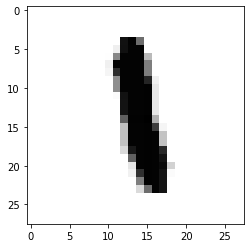

In [11]:
plt.imshow(x_train[n], cmap='Greys')

### 3. 資料整理

先看個範例, 因為 `numpy` 「廣播」的特性, 我們對 `array` 中所有數字要同除以一個數可瞬間完成!

In [12]:
# 除以 255 是為了將數字控制在0 ~1 之間
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

In [13]:
# 作 one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [14]:
y_train[n]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### 4. step 1: 打造神經網路
輸入: 784 (28x28)維向量 \
輸出: 10 維向量(辨識0-9數字)

> 調整參數測試:
  * 增加一層 Dense，100個神經元，epoch=20 >> accuracy = 0.94
  * 改 sigmoidㄝ,其餘參數不變 >> accuracy = 0.14
  * 神經元調到 200 個，epoch = 10 >> accuracy = 0.92 
  * loss改為mae，其餘參數不變 >> accuracy = 0.76
  * final: 增加一層Dense，50個神經元，mse, epoch =15 >> accuracy = 0.92

In [15]:
model = Sequential()

In [16]:
model.add(Dense(50, input_dim=784, activation='relu'))

In [17]:
model.add(Dense(50, activation='relu'))

In [18]:
model.add(Dense(50, activation='relu'))

In [19]:
model.add(Dense(50, activation='relu'))

In [20]:
model.add(Dense(10, activation='softmax'))

#### 組裝我們的神經網路

In [21]:
model.compile(loss='mse', optimizer=SGD(lr=0.087), 
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


#### 欣賞我們的作品

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
Total params: 47,410
Trainable params: 47,410
Non-trainable params: 0
_________________________________________________________________


### 5. step 2: 訓練

In [23]:
model.fit(x_train, y_train, batch_size=100, epochs=15)

Epoch 1/15
600/600 [==============================] - 2s 3ms/step - loss: 0.0896 - accuracy: 0.1244
Epoch 2/15
600/600 [==============================] - 2s 3ms/step - loss: 0.0862 - accuracy: 0.2913
Epoch 3/15
600/600 [==============================] - 2s 3ms/step - loss: 0.0725 - accuracy: 0.4615
Epoch 4/15
600/600 [==============================] - 2s 3ms/step - loss: 0.0473 - accuracy: 0.6718
Epoch 5/15
600/600 [==============================] - 2s 3ms/step - loss: 0.0286 - accuracy: 0.8208
Epoch 6/15
600/600 [==============================] - 2s 3ms/step - loss: 0.0212 - accuracy: 0.8655
Epoch 7/15
600/600 [==============================] - 2s 3ms/step - loss: 0.0182 - accuracy: 0.8837
Epoch 8/15
600/600 [==============================] - 2s 3ms/step - loss: 0.0165 - accuracy: 0.8935
Epoch 9/15
600/600 [==============================] - 2s 3ms/step - loss: 0.0153 - accuracy: 0.9011
Epoch 10/15
600/600 [==============================] - 2s 3ms/step - loss: 0.0145 - accuracy: 0.9064

### 6. step 3: 預測 (testing)

In [24]:
predict_x = model.predict(x_test)
classes_x=np.argmax(predict_x,axis=1)

神經網路預測是: 6


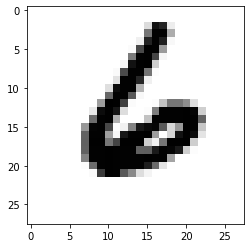

In [27]:
n = 8888

print('神經網路預測是:', classes_x[n])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys');

### 7. 儲存我們的 model

In [26]:
model.save("my_nn.h5")